##### duration: ~1/4 to 1/2 real time

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


### Get recording info (google sheets)

In [29]:
import requests
import pandas as pd
from io import BytesIO

In [30]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [31]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate,username,n_ephys_streams,max_video_duration_m
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10
1,M04003,30,24-05-01-13-51-17-581428,2024-05-01_13-51-09,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10
2,M04002,30,24-05-01-15-37-07-757018,2024-05-01_15-36-57,24-05-01-13-45-07-825493,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150,tis697,1,10


### Run

In [32]:
for idx, recording_row in recording_df.iterrows():
    break

In [33]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [34]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [35]:
output_directory_sizenorm = output_directory / 'size_normalization' / recording_row.video_recording_id
output_directory_sizenorm.mkdir(parents=True, exist_ok=True)

In [36]:
from multicamera_airflow_pipeline.tim_240731.keypoints.size_norm import SizeNormalizer 

In [37]:
!ls {output_directory}

2D_predictions	    continuous_features   openephys_sync      triangulation
2D_predictions-2    egocentric_alignment  size_normalization  triangulation2
arena_alignment     gimbal		  spikesorting
camera_calibration  gimbal2		  tensorrt
camera_sync	    gimbal3		  tensorrt-2


In [38]:
!ls { output_directory / 'gimbal' / recording_row.video_recording_id}

completed.log			gimbal_success.bool.10000x1.mmap
fit_likelihood.jpg		gimbal_success.bool.90009x1.mmap
gimbal.float32.10000x25x3.mmap	joint_directions.jpg
gimbal.float32.90009x25x3.mmap	keypoints_order_gimbal.npy
gimbal_params.p			skeleton_distances.jpg


In [39]:
predictions_3d_file = list(
    (output_directory / "gimbal" / recording_row.video_recording_id).glob(
        "gimbal.*.mmap"
    )
)[0]

In [40]:
import matplotlib.pyplot as plt

In [41]:
import numpy as np
def load_memmap_from_filename(filename):
    # Extract the metadata from the filename
    parts = filename.name.rsplit(".", 4)  # Split the filename into parts
    dtype_str = parts[-3]  # Get the dtype part of the filename
    shape_str = parts[-2]  # Get the shape part of the filename
    shape = tuple(map(int, shape_str.split("x")))  # Convert shape string to a tuple of integers
    # Load the array using numpy memmap
    array = np.memmap(filename, dtype=dtype_str, mode="r", shape=shape)
    return array

In [42]:
gimbal = load_memmap_from_filename(predictions_3d_file)

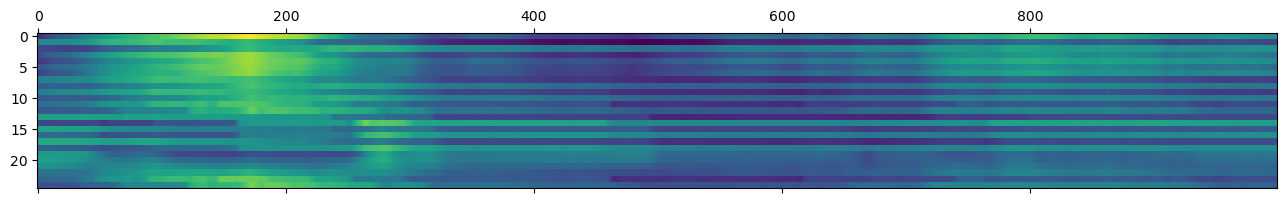

In [43]:
plt.matshow(gimbal[:1000, :, 0].T, aspect='auto');

In [181]:
predictions_3d_file

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.size_norm:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/gimbal/24-05-01-13-26-43-110846/gimbal.float32.10000x25x3.mmap')

In [182]:
size_normalizer = SizeNormalizer(
    predictions_3d_file = predictions_3d_file,
    size_norm_output_directory = output_directory_sizenorm,
    recompute_completed=True
)

INFO:multicamera_airflow_pipeline.tim_240731.keypoints.size_norm:Starting size normalization


calculating joint lengths:   0%|          | 0/26 [00:00<?, ?it/s]

calculating angles:   0%|          | 0/10000 [00:00<?, ?it/s]

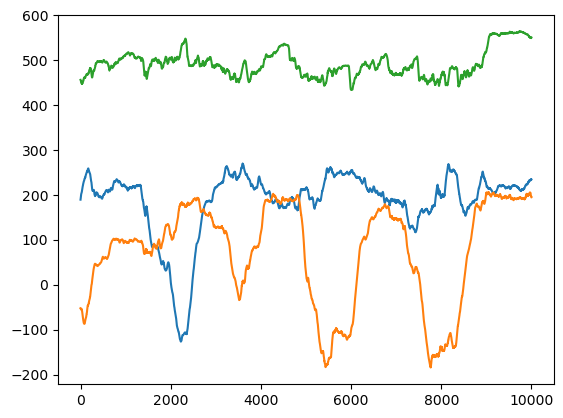

computing new keypoint positions:   0%|          | 0/26 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

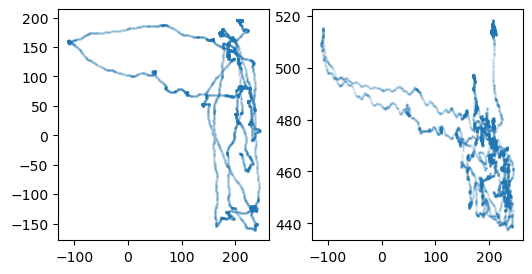

In [183]:
size_normalizer.run()

In [149]:
sizenorm = load_memmap_from_filename( output_directory_sizenorm / "size_norm.float32.10000x25x3.mmap")

In [178]:
np.max(sizenorm), np.min(sizenorm)

(49.06472, -75.324684)

In [175]:
centroids = np.mean(sizenorm, axis=1)

In [150]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

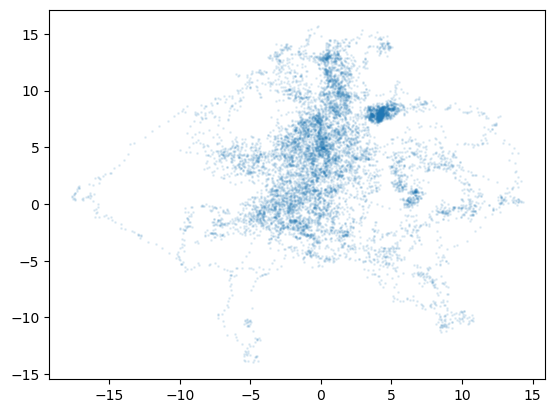

In [176]:
plt.scatter(centroids[:,0], centroids[:,1], alpha = 0.1, s=1)

### Testing

In [44]:
breakme

NameError: name 'breakme' is not defined

In [151]:
from multicamera_airflow_pipeline.tim_240731.skeletons.defaults import (
    dataset_info,
    parents_dict,
    keypoint_info,
    skeleton_info,
    keypoints,
    keypoints_order,
    kpt_dict,
    default_template_bone_length_mean,
    default_template_bone_length_std,
    default_hierarchy,
)

In [180]:
predictions_3d_file

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/gimbal/24-05-01-13-26-43-110846/gimbal.float32.10000x25x3.mmap')

In [152]:
predictions_3D_mmap = load_memmap_from_filename(predictions_3d_file)

In [153]:
predictions_3D_mmap.shape

(10000, 25, 3)

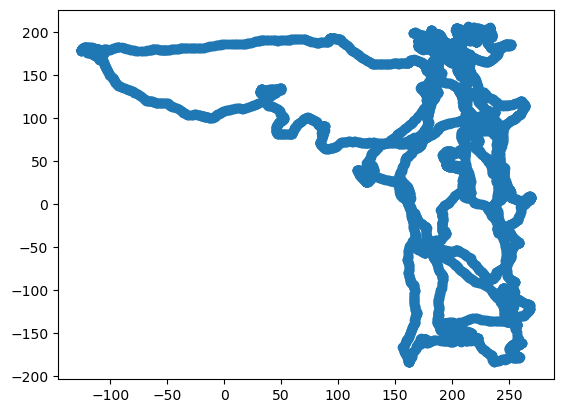

In [154]:
plt.scatter(predictions_3D_mmap[:,0, 0], predictions_3D_mmap[:,0, 1])

In [155]:
hierarchy = default_hierarchy

In [156]:
root_joint = "spine_base"

In [157]:
from multicamera_airflow_pipeline.tim_240731.keypoints.size_norm import *

In [158]:
keypoints = np.array(list(kpt_dict.keys()))

keypoints_to_index = {kpt: i for i, kpt in enumerate(keypoints)}

In [159]:
kpts = np.array(predictions_3D_mmap)

# add a 'spine base' to set as the
spine_high_idx = np.where(np.array(keypoints) == "spine_high")[0][0]
spine_mid_idx = np.where(np.array(keypoints) == "spine_mid")[0][0]
spine_base_pos = np.expand_dims(
    (kpts[:, spine_mid_idx] + kpts[:, spine_high_idx]) / 2, 1
)
kpts = np.concatenate([kpts, spine_base_pos], axis=1)
keypoints_to_index["spine_base"] = len(keypoints)

In [160]:
# initialize positions (fill in any nans, shouldn't be needed with gimbal)
kpts = generate_initial_positions(kpts)

# convert keypoints to a dictionary
kpts_dict = {}
for key, k_index in keypoints_to_index.items():
    kpts_dict[key] = kpts[:, k_index]
kpts_dict["joints"] = list(keypoints_to_index.keys())
kpts = kpts_dict

# assign hierarchy
kpts["hierarchy"] = hierarchy
kpts["root_joint"] = root_joint

In [161]:
template_bone_length_mean=default_template_bone_length_mean
template_bone_length_std=default_template_bone_length_std

In [162]:
subsample =None
n_jobs = 10
rigid_bones = False

In [163]:
# compute bone lengths and stds
kpts = get_bone_lengths(
    kpts,
    template_bone_length_mean,
    template_bone_length_std,
)

calculating joint lengths:   0%|          | 0/26 [00:00<?, ?it/s]

In [164]:
# create a skeleton to recompute positions from angles
kpts = generate_kpt_offsets_and_skeleton(kpts, hierarchy)

In [165]:
from joblib import Parallel, delayed

In [166]:
# calculate joint angles and add them in as kpts[joint+'_angles']
kpts = calculate_joint_angles_parallel(
    kpts,
    root_joint=root_joint,
    samples_to_calculate=subsample,
    n_jobs=n_jobs,
)

calculating angles:   0%|          | 0/10000 [00:00<?, ?it/s]

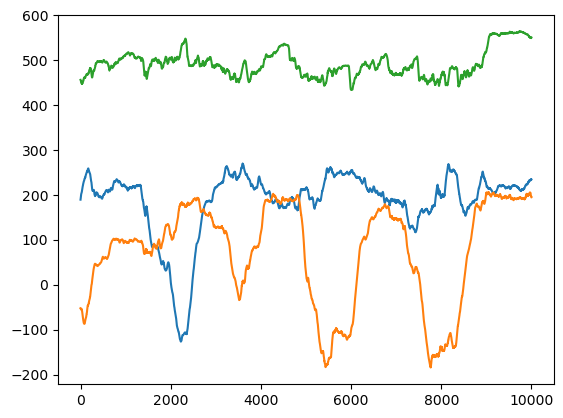

In [167]:
plt.plot(kpts['nose_tip'])

In [168]:
# compute new sizes
kpts = size_normalize(
    kpts,
    template_bone_length_mean=template_bone_length_mean,
    hierarchy=hierarchy,
    root_joint=root_joint,
    rigid_bones=rigid_bones,
)

computing new keypoint positions:   0%|          | 0/26 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

adding bone length:   0%|          | 0/10000 [00:00<?, ?it/s]

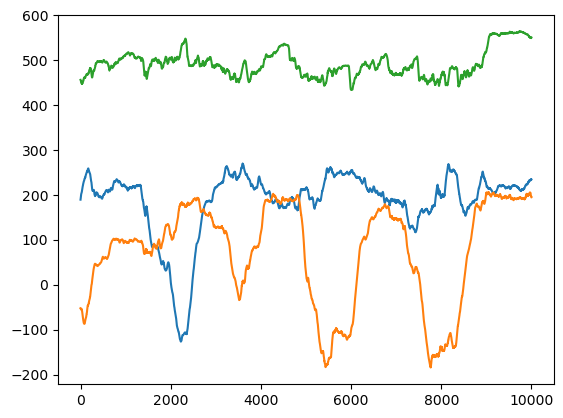

In [169]:
plt.plot(kpts['nose_tip'])

In [170]:
# convert back to array
recomputed_keypoints = np.stack(
    [kpts[f"recomputed_{joint}"] for joint in keypoints], axis=1
)

In [171]:
# convert angles back to array
recomputed_angles = np.stack(
    [kpts[f"recomputed_angles_{joint}"] for joint in keypoints], axis=1
)
recomputed_angles[:, :, 2] = (
    recomputed_angles[:, :, 2]
    + np.expand_dims(kpts[f"{root_joint}_angles"][:, 2], -1)
) % (2 * np.pi)
recomputed_angles[:, :, 2][recomputed_angles[:, :, 2] > np.pi] -= 2 * np.pi

In [172]:
recomputed_keypoints.shape

(10000, 25, 3)

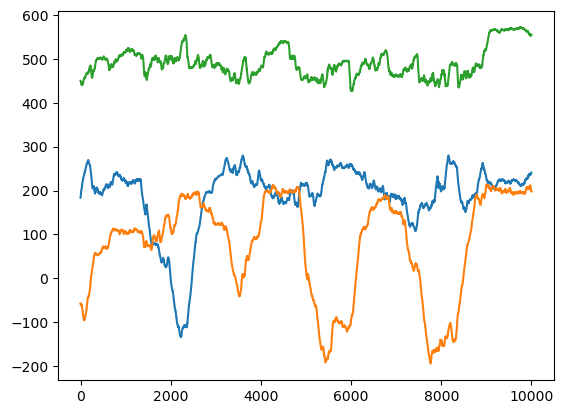

In [173]:
plt.plot(recomputed_keypoints[:, 0 ])

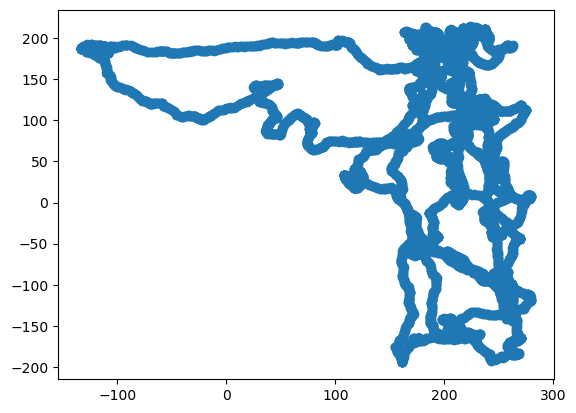

In [174]:
plt.scatter(recomputed_keypoints[:,0, 0], recomputed_keypoints[:,0, 1])

In [179]:
np.max(recomputed_keypoints), np.min(recomputed_keypoints)

(572.2131610449381, -194.67340357328555)

In [184]:
sizenorm = load_memmap_from_filename(Path("/n/groups/datta/kpts_pipeline/tim_240731/results/size_normalization/24-05-01-13-26-43-110846/kpt_pos_nose_tip.png"))

IndexError: list index out of range